In [196]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [197]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [18, 8]})

In [199]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(18,8)
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

C:\Users\aaron\AppData\Local\Temp\ipykernel_28588\3487580634.py:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [200]:
ticker = ['TSLA']
start = datetime.datetime(2018,8, 6)
end = datetime.datetime(2023, 8, 4)
df = yf.download(ticker, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [201]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-06,23.030666,23.665333,22.788000,22.799334,22.799334,128464500
2018-08-07,22.922667,25.830667,22.610001,25.304667,25.304667,463137000
2018-08-08,24.606001,25.509333,24.474667,24.689333,24.689333,368568000
2018-08-09,24.370001,24.467333,23.048668,23.496668,23.496668,257757000
2018-08-10,23.600000,24.000000,23.066668,23.699333,23.699333,173280000
...,...,...,...,...,...,...
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000
2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000


In [202]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh
cf.go_offline()
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [203]:
df['Close'].iplot()

In [204]:
fig_price=px.line(df['Close'], title='Price of TSLA')
fig_price.show()

In [205]:
df.reset_index(inplace=True)
df=df[['Date', 'Close']]

In [206]:
df

,Date,Close
0,2018-08-06,22.799334
1,2018-08-07,25.304667
2,2018-08-08,24.689333
3,2018-08-09,23.496668
4,2018-08-10,23.699333
...,...,...
1252,2023-07-28,266.440002
1253,2023-07-31,267.429993
1254,2023-08-01,261.070007
1255,2023-08-02,254.110001


In [207]:
df['Date']

0      2018-08-06
1      2018-08-07
2      2018-08-08
3      2018-08-09
4      2018-08-10
          ...    
1252   2023-07-28
1253   2023-07-31
1254   2023-08-01
1255   2023-08-02
1256   2023-08-03
Name: Date, Length: 1257, dtype: datetime64[ns]

In [208]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2018-08-06')
datetime_object

datetime.datetime(2018, 8, 6, 0, 0)

In [209]:
df

,Date,Close
0,2018-08-06,22.799334
1,2018-08-07,25.304667
2,2018-08-08,24.689333
3,2018-08-09,23.496668
4,2018-08-10,23.699333
...,...,...
1252,2023-07-28,266.440002
1253,2023-07-31,267.429993
1254,2023-08-01,261.070007
1255,2023-08-02,254.110001


In [210]:
df.index = df.pop('Date')
df

,Close
Date,
2018-08-06,22.799334
2018-08-07,25.304667
2018-08-08,24.689333
2018-08-09,23.496668
2018-08-10,23.699333
...,...
2023-07-28,266.440002
2023-07-31,267.429993
2023-08-01,261.070007


<Axes: xlabel='Date'>

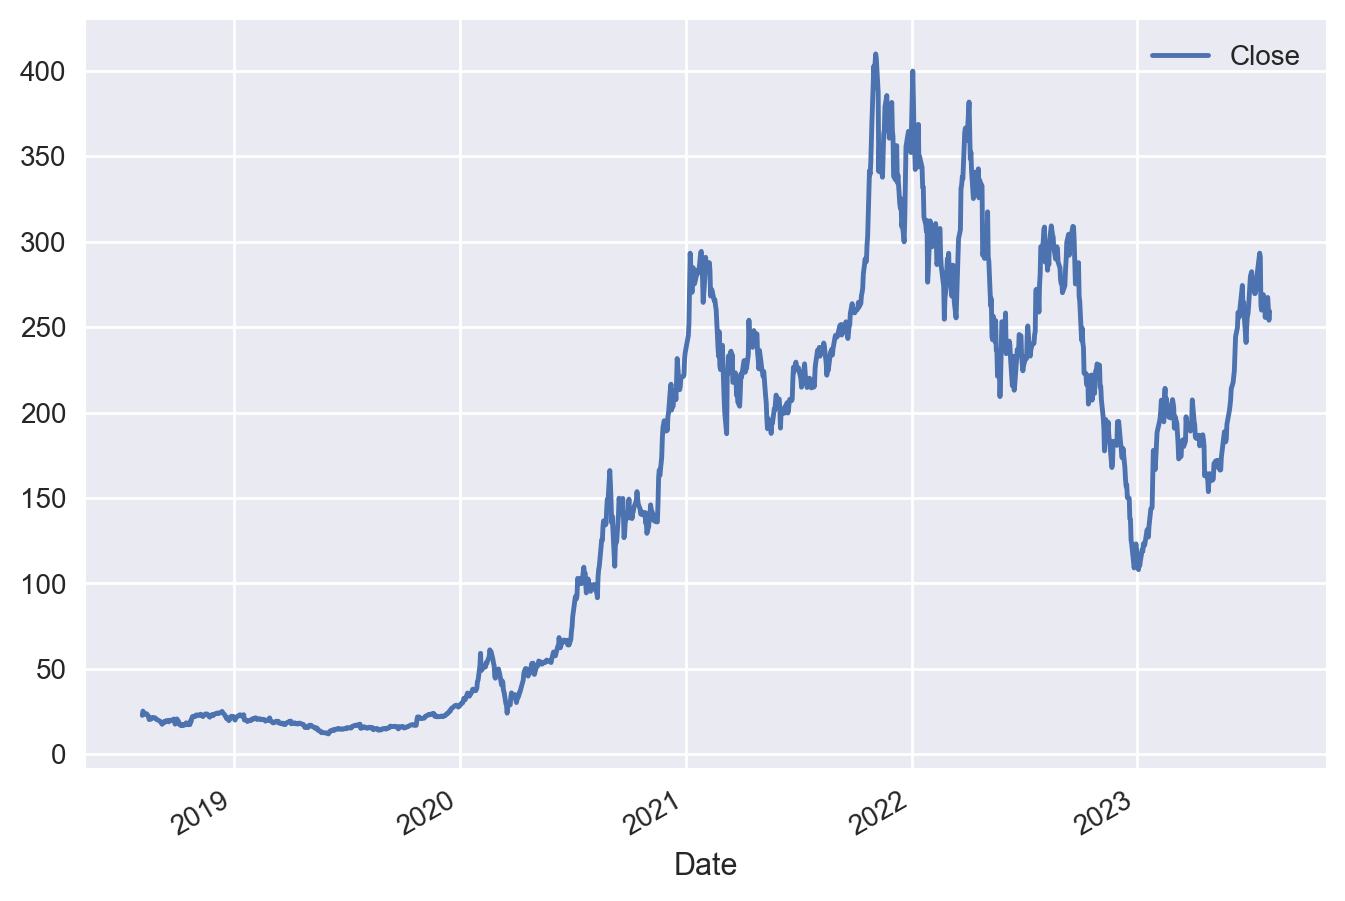

In [211]:
import matplotlib.pyplot as plt
df.plot()

In [212]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df


windowed_df = df_to_windowed_df(df,
                                '2018-08-09',
                                '2023-08-03',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2018-08-09,22.799334,25.304667,24.689333,23.496668
1,2018-08-10,25.304667,24.689333,23.496668,23.699333
2,2018-08-13,24.689333,23.496668,23.699333,23.760668
3,2018-08-14,23.496668,23.699333,23.760668,23.176001
4,2018-08-15,23.699333,23.760668,23.176001,22.579332
...,...,...,...,...,...
1249,2023-07-28,265.279999,264.350006,255.710007,266.440002
1250,2023-07-31,264.350006,255.710007,266.440002,267.429993
1251,2023-08-01,255.710007,266.440002,267.429993,261.070007
1252,2023-08-02,266.440002,267.429993,261.070007,254.110001


In [213]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1254,), (1254, 3, 1), (1254,))

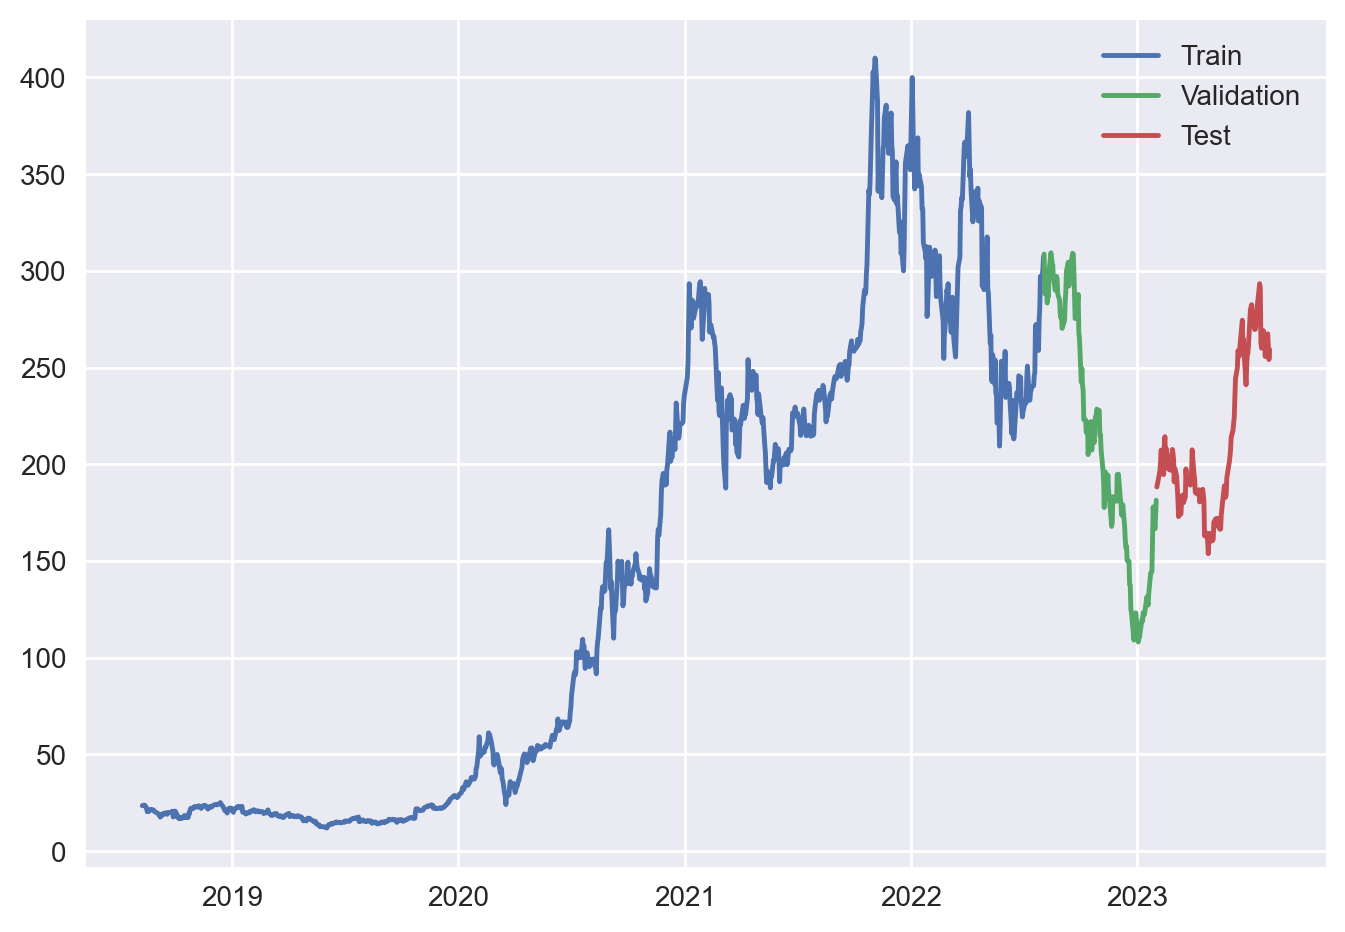

In [214]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [215]:
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 18ms/step - loss: 32966.1523 - mean_absolute_error: 136.8788 - val_loss: 48313.7617 - val_mean_absolute_error: 210.4970
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 31152.4902 - mean_absolute_error: 128.7039 - val_loss: 42161.0195 - val_mean_absolute_error: 195.0112
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 23767.4961 - mean_absolute_error: 113.0271 - val_loss: 23513.9160 - val_mean_absolute_error: 139.7871
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 11696.2373 - mean_absolute_error: 73.6959 - val_loss: 6724.5391 - val_mean_absolute_error: 63.5281
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 3209.4050 - mean_absolute_error: 30.2278 - val_loss: 987.8756 - val_mean_absolute_error: 23.8614
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 814.7246 - mean_absolute_error: 13.3115 - val_loss: 144.249

32/32 [==============================] - 0s 1ms/step


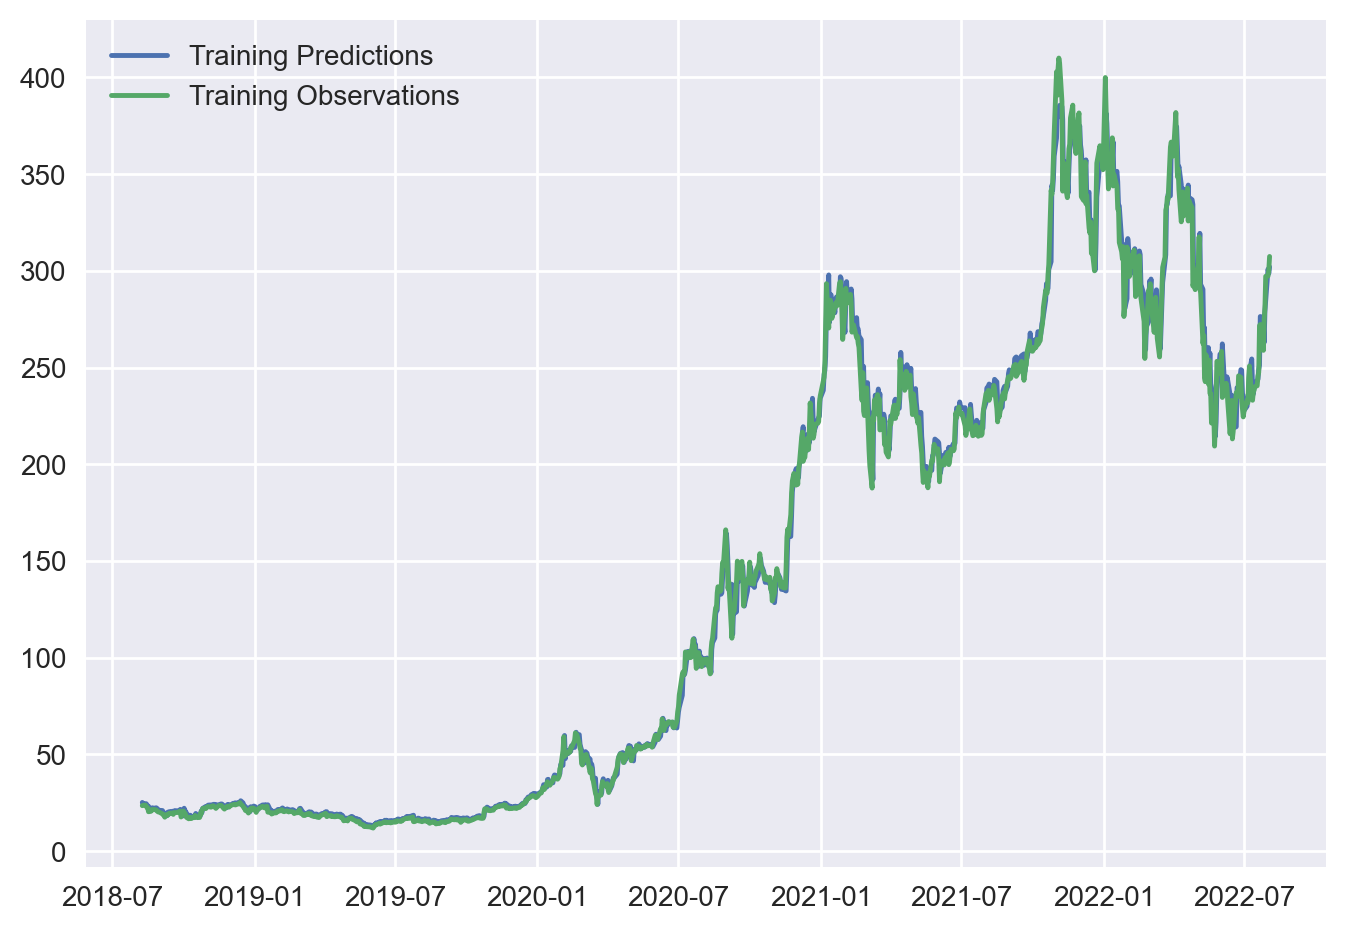

In [216]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

4/4 [==============================] - 0s 4ms/step


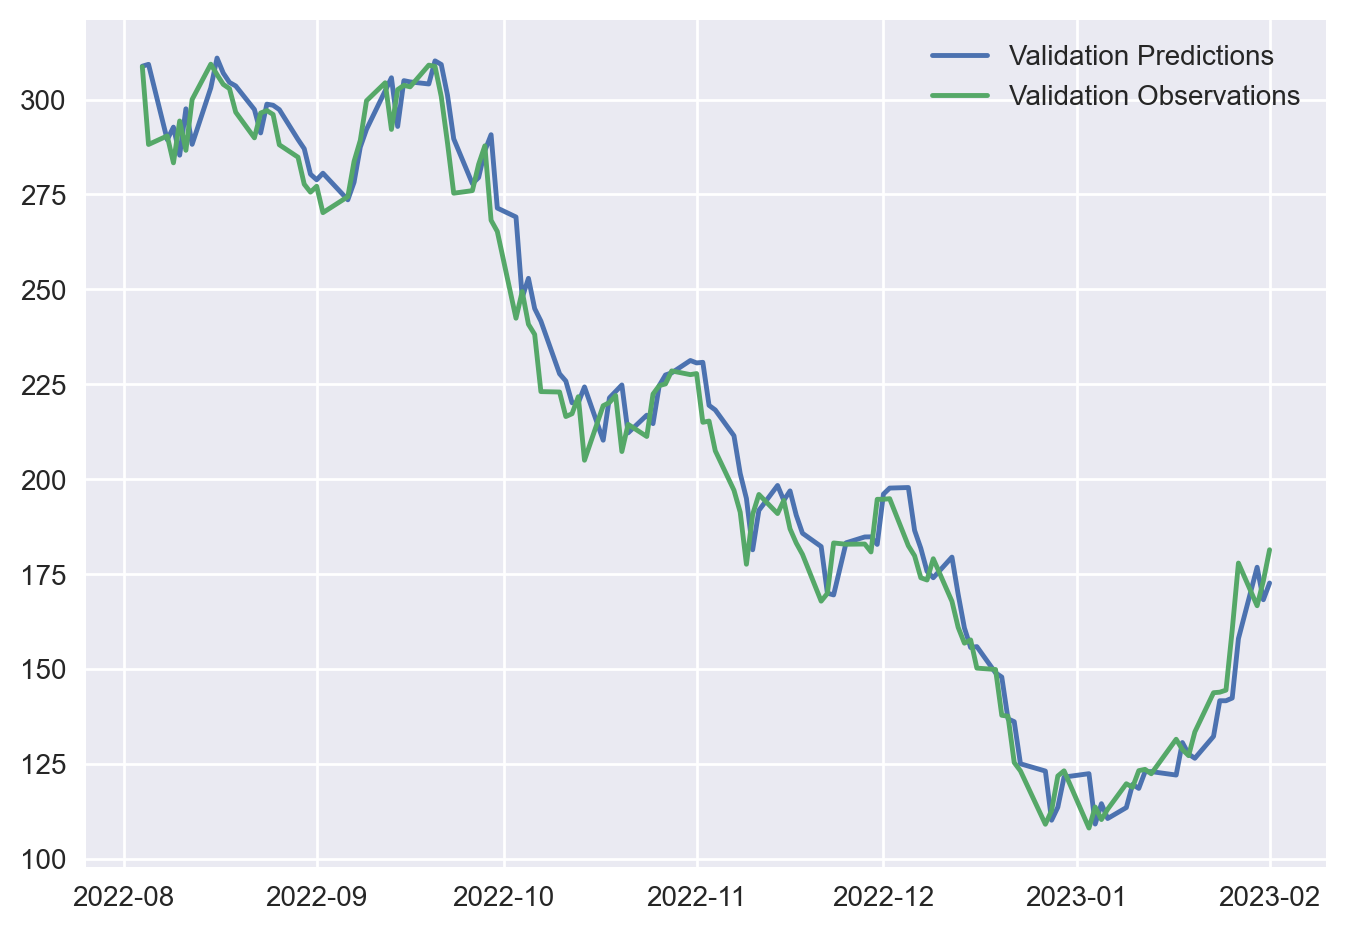

In [217]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 [==============================] - 0s 3ms/step


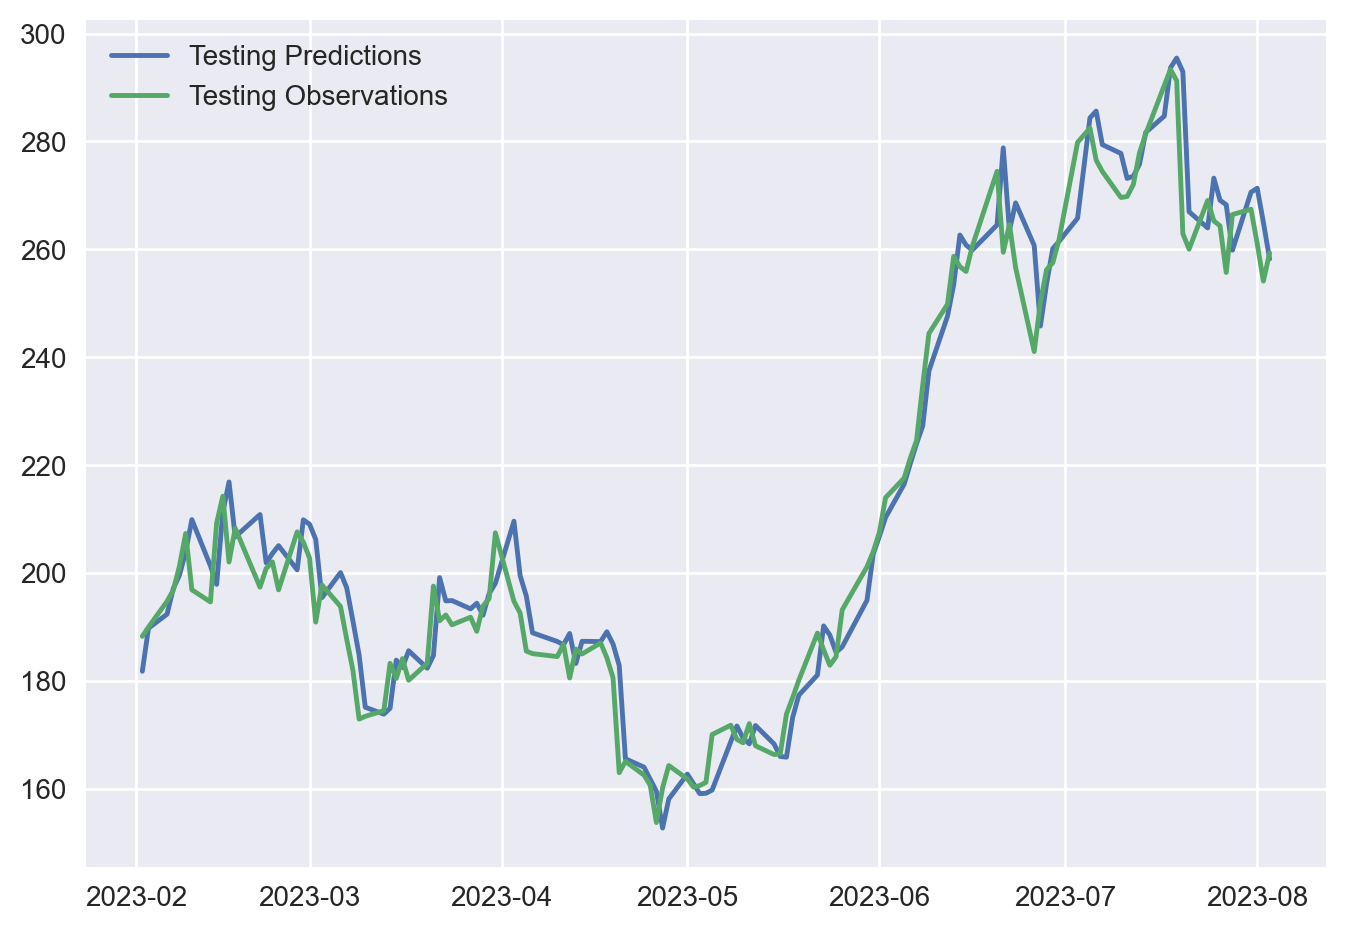

In [218]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

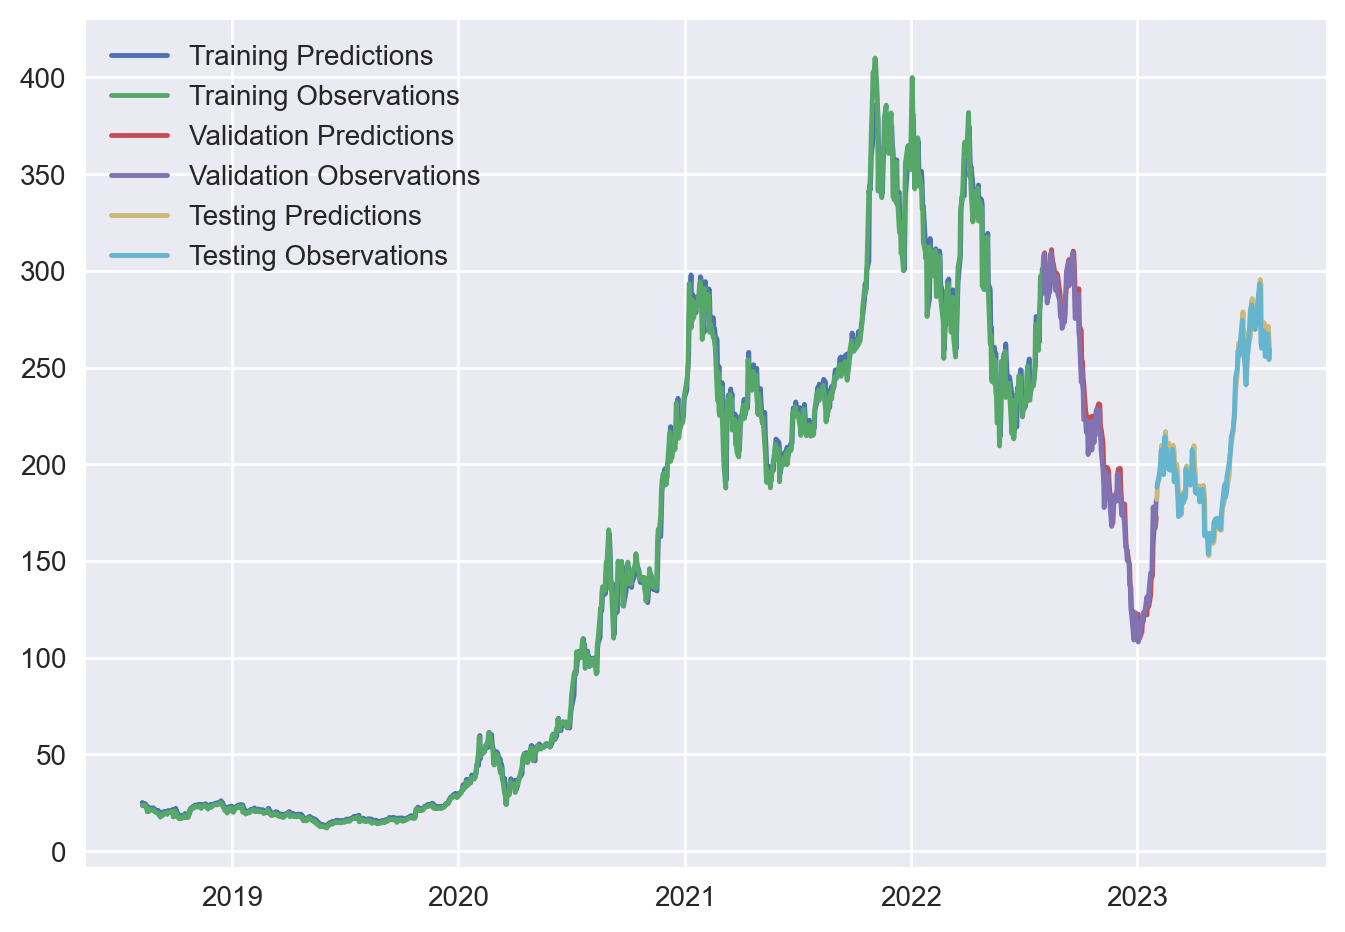

In [219]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [220]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 19ms/step


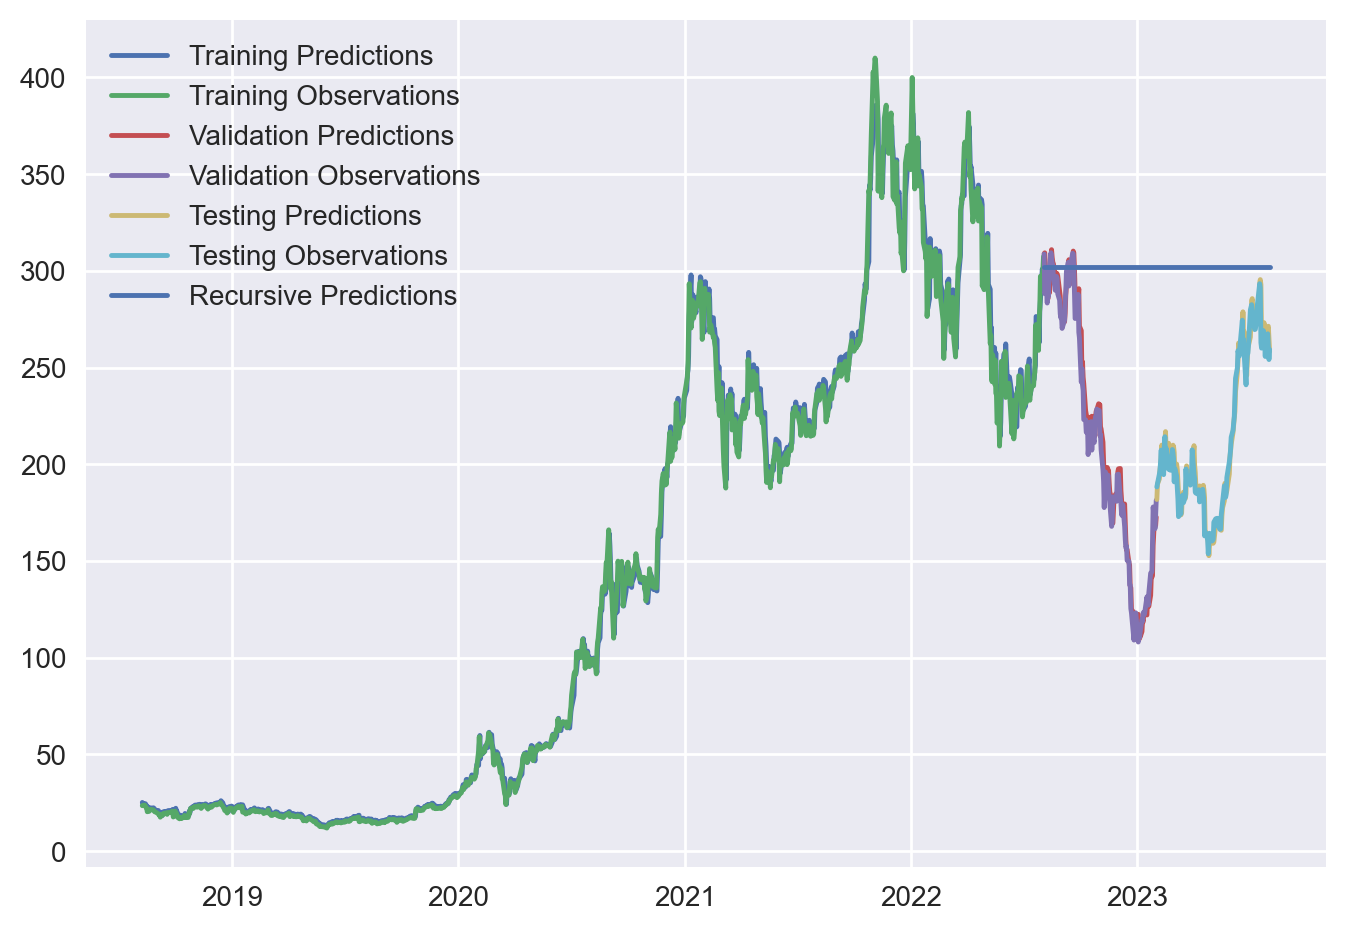

In [221]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])